In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import os
print(os.getcwd())

C:\Workspaces\SKN14-2nd-5Team\SumiLee


In [4]:
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')

print(customers_df.shape, orders_df.shape, order_payments_df.shape)

(99441, 5) (99441, 8) (103886, 5)


In [5]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# customer_unique_id 병합
orders_customers_merged = pd.merge(
    orders_df,
    customers_df[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

orders_customers_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


In [7]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
# payment_value 병합
payments_orders_customers_merged = pd.merge(
    order_payments_df,
    orders_customers_merged[['order_id', 'customer_unique_id', 'order_purchase_timestamp']],
    on='order_id',
    how='left'
)

payments_orders_customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  103886 non-null  object 
 1   payment_sequential        103886 non-null  int64  
 2   payment_type              103886 non-null  object 
 3   payment_installments      103886 non-null  int64  
 4   payment_value             103886 non-null  float64
 5   customer_unique_id        103886 non-null  object 
 6   order_purchase_timestamp  103886 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ MB


In [9]:
rfm_df = payments_orders_customers_merged.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': 'max',
    'order_id': pd.Series.nunique,
    'payment_value': 'sum'
})
rfm_df = rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency', # 최근 구매 경과일
    'order_id': 'Frequency', # 구매 빈도
    'payment_value': 'Monetary' # 총 구매금액
})

rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96095 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    96095 non-null  object 
 1   Frequency  96095 non-null  int64  
 2   Monetary   96095 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ MB


In [10]:
# 1. 날짜형으로 변환
rfm_df['Recency'] = pd.to_datetime(rfm_df['Recency'])

# 2. max_date도 자동으로 datetime으로 저장됨
max_date = rfm_df['Recency'].max()

# 3. 날짜 차이 계산 (timedelta)
rfm_df['Recency'] = max_date - rfm_df['Recency']

rfm_df.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160 days 06:33:51,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163 days 06:18:51,1,27.19
0000f46a3911fa3c0805444483337064,585 days 20:25:15,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,369 days 21:00:37,1,43.62
0004aac84e0df4da2b147fca70cf8255,336 days 21:44:36,1,196.89


In [11]:
rfm_df['Recency'] = rfm_df['Recency'].apply(lambda x: x.days + 1)
rfm_df.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
0000f46a3911fa3c0805444483337064,586,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
0004aac84e0df4da2b147fca70cf8255,337,1,196.89


In [78]:
# 구간 설정 및 범주 이름 지정
bins = [0, 2, 5, float('inf')]  # 0~2: low, 3~5: mid, 6~: high
labels = ['low', 'mid', 'high']

# 구간화
rfm_df['Frequency_level'] = pd.cut(rfm_df['Frequency'], bins=bins, labels=labels)

rfm_df.head()

,Recency,Frequency,Monetary,Frequency_level
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,low
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,low
0000f46a3911fa3c0805444483337064,586,1,86.22,low
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,low
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,low


In [79]:
# 매핑 딕셔너리 정의
f_score_map = {
    'low': 1,
    'mid': 3,
    'high': 5
}

# Categorical 컬럼을 문자열로 변환 후 매핑
rfm_df['F_score'] = rfm_df['Frequency_level'].astype(str).map(f_score_map).fillna(2).astype(int)

In [80]:
# 분위수 구간 계산 (NaN 발생 대비 + 분위수 구간 부족 대비)
for col in ['Recency', 'Monetary']:
    try:
        rfm_df[col[0] + '_quantile'] = pd.qcut(
            rfm_df[col],
            5,
            labels=False,
            duplicates='drop'
        )
    except ValueError:
        # 전부 동일하거나 분위수 계산 불가한 경우 → 값 전체를 중간값으로 처리
        rfm_df[col[0] + '_quantile'] = 2

# NaN이 생긴 경우 기본값 2로 대체
rfm_df[['R_quantile', 'M_quantile']] = rfm_df[['R_quantile', 'M_quantile']].fillna(2)

# RFM 점수 계산
rfm_df['R_score'] = (5 - rfm_df['R_quantile']).astype(int)  # Recency는 낮을수록 높게
rfm_df['M_score'] = (1 + rfm_df['M_quantile']).astype(int)

# 최종 RFM Score 조합
rfm_df['RFM_score'] = (
    rfm_df['R_score'].astype(str) +
    rfm_df['F_score'].astype(str) +
    rfm_df['M_score'].astype(str)
)

# 결과 출력
print(rfm_df[['Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score', 'RFM_score']])

                                  Recency  Frequency  Monetary  R_score  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90        4   
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19        4   
0000f46a3911fa3c0805444483337064      586          1     86.22        1   
0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62        2   
0004aac84e0df4da2b147fca70cf8255      337          1    196.89        2   
...                                   ...        ...       ...      ...   
fffcf5a5ff07b0908bd4e2dbc735a684      496          1   2067.42        1   
fffea47cd6d3cc0a88bd621562a9d061      311          1     84.58        3   
ffff371b4d645b6ecea244b27531430a      618          1    112.46        1   
ffff5962728ec6157033ef9805bacc48      169          1    133.69        4   
ffffd2657e2aad2907e67c3e9daecbeb      533          1     71.56        1   

                        

In [81]:
print(rfm_df['R_score'].value_counts(), '\n')
print(rfm_df['F_score'].value_counts(), '\n')
print(rfm_df['M_score'].value_counts(), '\n')

R_score
5    19324
2    19300
4    19299
1    19129
3    19043
Name: count, dtype: int64 

F_score
1    95843
3      241
5       11
Name: count, dtype: int64 

M_score
3    19222
1    19221
2    19219
5    19219
4    19214
Name: count, dtype: int64 



In [82]:
def classify_churn(row):
    if row['R_score'] <= 2 and row['F_score'] <= 2:
        return 1
    else:
        return 0

# 이탈 여부 태깅
rfm_df['churn'] = rfm_df.apply(classify_churn, axis=1)

In [83]:
rfm_df = rfm_df.reset_index()
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,Frequency_level,F_score,R_quantile,M_quantile,R_score,M_score,RFM_score,churn
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,low,1,1,3,4,4,414,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,low,1,1,0,4,1,411,0
2,0000f46a3911fa3c0805444483337064,586,1,86.22,low,1,4,1,1,2,112,1
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,low,1,3,0,2,1,211,1
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,low,1,3,3,2,4,214,1


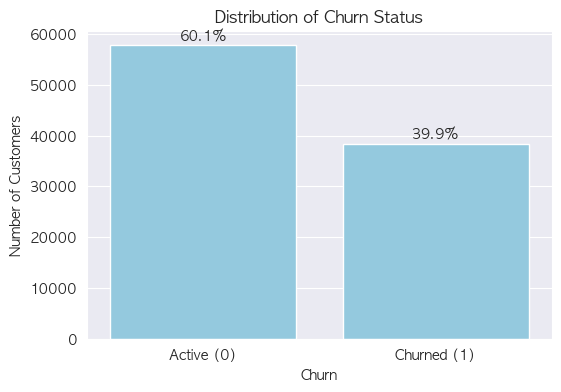

In [84]:
churn_counts = rfm_df['churn'].value_counts().sort_index()
total = churn_counts.sum()

plt.figure(figsize=(6,4))
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, color='skyblue')

plt.xticks([0,1], ['Active (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churn Status')

# 막대 위에 비율 표시
for i, count in enumerate(churn_counts.values):
    percentage = count / total * 100
    ax.text(i, count + total*0.01, f'{percentage:.1f}%', ha='center')

plt.show()